In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

In [4]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [6]:
df['area_type'].value_counts()

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64

In [7]:
#Drop the columns you think are not necessary (Assumming this info is given by data analysts)
df1 = df.drop(['area_type','availability', 'society', 'balcony'], axis='columns')

In [8]:
#Drop na values
df1.isnull().sum()
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
#Adding new column bhk which holds the bedroom count only other than the string that's present in size
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2
#df2.bhk.unique()

/var/folders/dc/xrh_ytj95rbbnb1bhh2rnf5r0000gn/T/ipykernel_79127/2008064841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [14]:
def check_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df2[df2['total_sqft'].apply(check_float)].head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [18]:
#check for all those total_area values which are not in float but are in different formats
df2[~df2['total_sqft'].apply(check_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def convert_range_to_num(x):
    if '-' in x:
        start, end = map(float, x.split('-'))
        return (start + end) / 2
    try:
        return float(x)
    except ValueError:
        return None


In [20]:
#Converting all sqrt values in ranges by taking their averages
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_range_to_num)
df3 = df3[df3.total_sqft.notnull()]
df3.head(2)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4


In [22]:
df3.loc[122]

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath             4.0
price          477.0
bhk                4
Name: 122, dtype: object

In [23]:
(3067+8156)/2

5611.5

In [24]:
#Adding a new column having price per square feet
df4 = df3.copy()
df4['price_per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [26]:
#Understanding how many values locations has as it willhave to be dimenionally reduced
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [27]:
len(location_stats)

1287

In [28]:
len(location_stats[location_stats<=10])

1047

In [29]:
#Any location having less than 10 data points will be tagged as "other" location. 
#This way number of categories can be reduced by huge amount. 
location_less_than_10 = location_stats[location_stats<=10]
location_less_than_10


location
BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: count, Length: 1047, dtype: int64

In [33]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_less_than_10 else x)
len(df4.location.unique())



241

In [39]:

filtered_df = df4[df4['location'] == 'other']
filtered_df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804
18,other,3 BHK,2770.0,4.0,290.00,3,10469.314079
19,other,2 BHK,1100.0,2.0,48.00,2,4363.636364
25,other,3 BHK,1250.0,3.0,56.00,3,4480.000000
42,other,1 BHK,600.0,1.0,38.00,1,6333.333333
...,...,...,...,...,...,...,...
13291,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443
13292,other,3 BHK,1440.0,2.0,63.93,3,4439.583333
13302,other,2 BHK,1075.0,2.0,48.00,2,4465.116279
13306,other,4 Bedroom,1200.0,5.0,325.00,4,27083.333333


In [40]:
#Outlier Removal
#Given
#As a data scientist when you have a conversation with your business manager (who has expertise in real estate), he will tell you that normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft

In [42]:
df4[df4.total_sqft/df4.bhk<300].head()
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12456, 7)

In [48]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()  # Create an empty DataFrame to store filtered data
    for location, data in df.groupby('location'):  # Group data by location
        mean_price_per_sqft = np.mean(data['price_per_sqft'])  # Calculate mean price per sqft for the location
        std_price_per_sqft = np.std(data['price_per_sqft'])  # Calculate standard deviation of price per sqft for the location
        # Filter data to remove outliers based on mean and standard deviation
        filtered_data = data[(data['price_per_sqft'] > (mean_price_per_sqft - std_price_per_sqft)) & 
                             (data['price_per_sqft'] <= (mean_price_per_sqft + std_price_per_sqft))]
        df_out = pd.concat([df_out, filtered_data], ignore_index=True)  # Concatenate filtered data to df_out
    return df_out  # Return the DataFrame without outliers

In [49]:
df6 = remove_pps_outliers(df5)
df6.shape

(10242, 7)

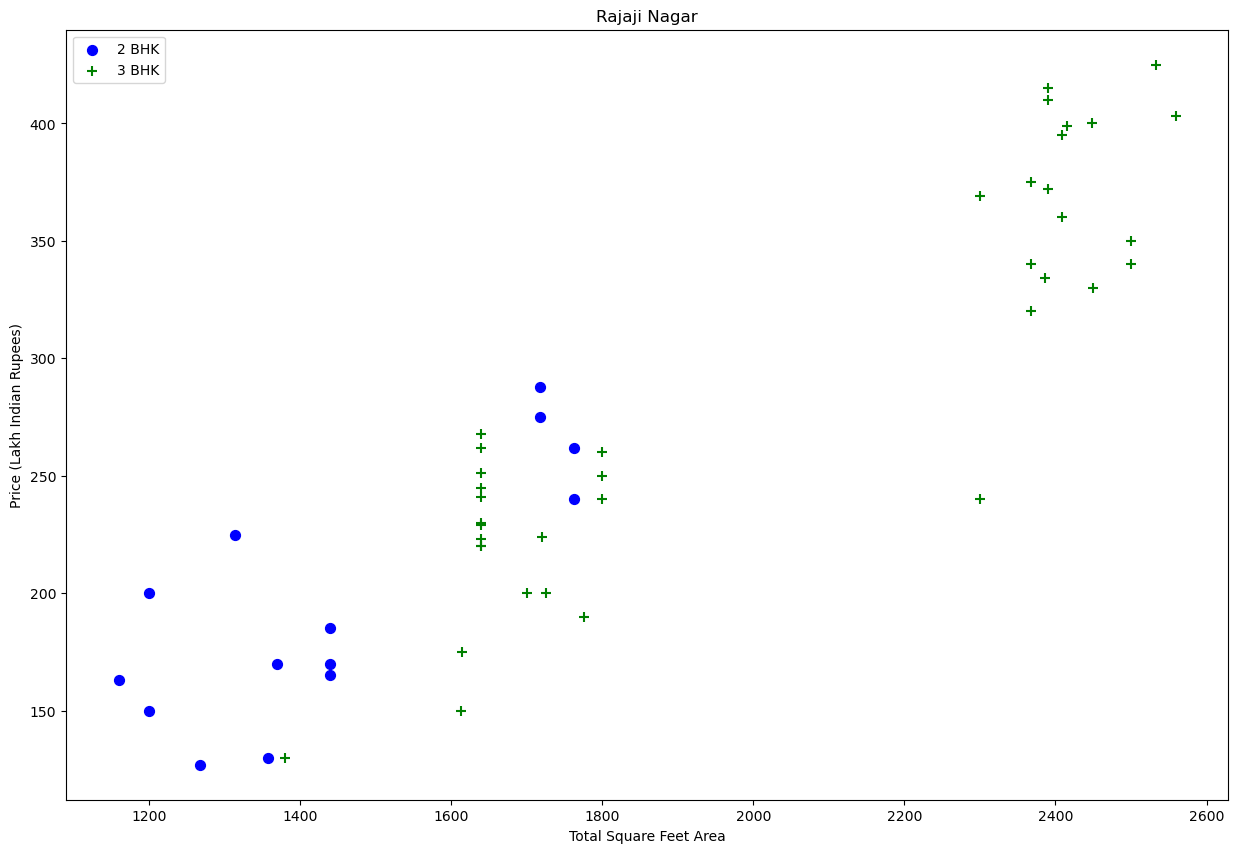

In [57]:
from matplotlib import pyplot as plt
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar")

#Notice that 2bhk is more pricier than 3bhk for same location

In [75]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        
        
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            
            if stats and stats['count'] > 5:
                print(f"Location: {location}")
                print(f"BHK: {bhk}")
                print(f"Mean Price per Sqft of Previous BHK {bhk -1}: {stats['mean']}")
                print(f"Price per Sqft of Current BHK:")
                print(bhk_df.price_per_sqft)
                print(f"Difference :")
                print(bhk_df[bhk_df.price_per_sqft<(stats['mean'])])
                
                # Outlier detection and exclusion code goes here
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
                print(f"exclude_indices: {exclude_indices}")
                
                
    return df.drop(exclude_indices,axis='index')

df7 = remove_bhk_outliers(df6)
df7.shape

Location: 1st Phase JP Nagar
BHK: 3
Mean Price per Sqft of Previous BHK 2: 7931.806799837383
Price per Sqft of Current BHK:
8      8906.666667
10    10169.491525
11     7756.916996
12    10927.634774
17     8238.993711
18     9633.027523
22     8425.613866
Name: price_per_sqft, dtype: float64
Difference :
              location   size  total_sqft  bath  price  bhk  price_per_sqft
11  1st Phase JP Nagar  3 BHK      2024.0   3.0  157.0    3     7756.916996
exclude_indices: [11.]
Location: 1st Phase JP Nagar
BHK: 4
Mean Price per Sqft of Previous BHK 3: 9151.192151725822
Price per Sqft of Current BHK:
7     8849.557522
23    5274.725275
25    8489.483748
Name: price_per_sqft, dtype: float64
Difference :
              location   size  total_sqft  bath  price  bhk  price_per_sqft
7   1st Phase JP Nagar  4 BHK      2825.0   4.0  250.0    4     8849.557522
23  1st Phase JP Nagar  4 BHK      4550.0   2.0  240.0    4     5274.725275
25  1st Phase JP Nagar  4 BHK      2615.0   5.0  222.0    4   

(7317, 7)

In [68]:
values = [8906.666667, 10169.491525, 7756.916996, 10927.634774, 8238.993711, 9633.027523, 8425.613866]

mean_value = np.mean(values)
print(mean_value)

9151.192151714286


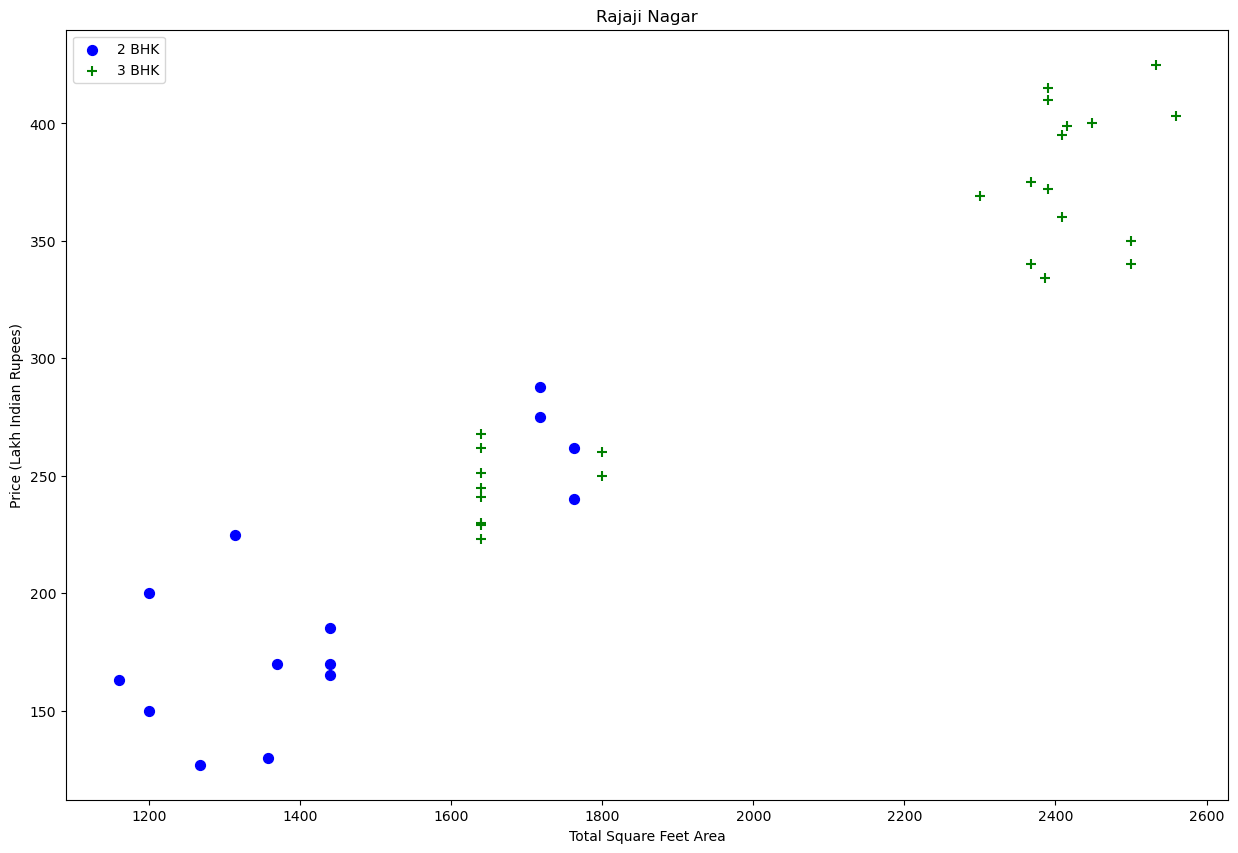

In [79]:
#Notice now the bhk homes are not anymore expensiver than 3bh for same location and sqrt_area
plot_scatter_chart(df7,"Rajaji Nagar")


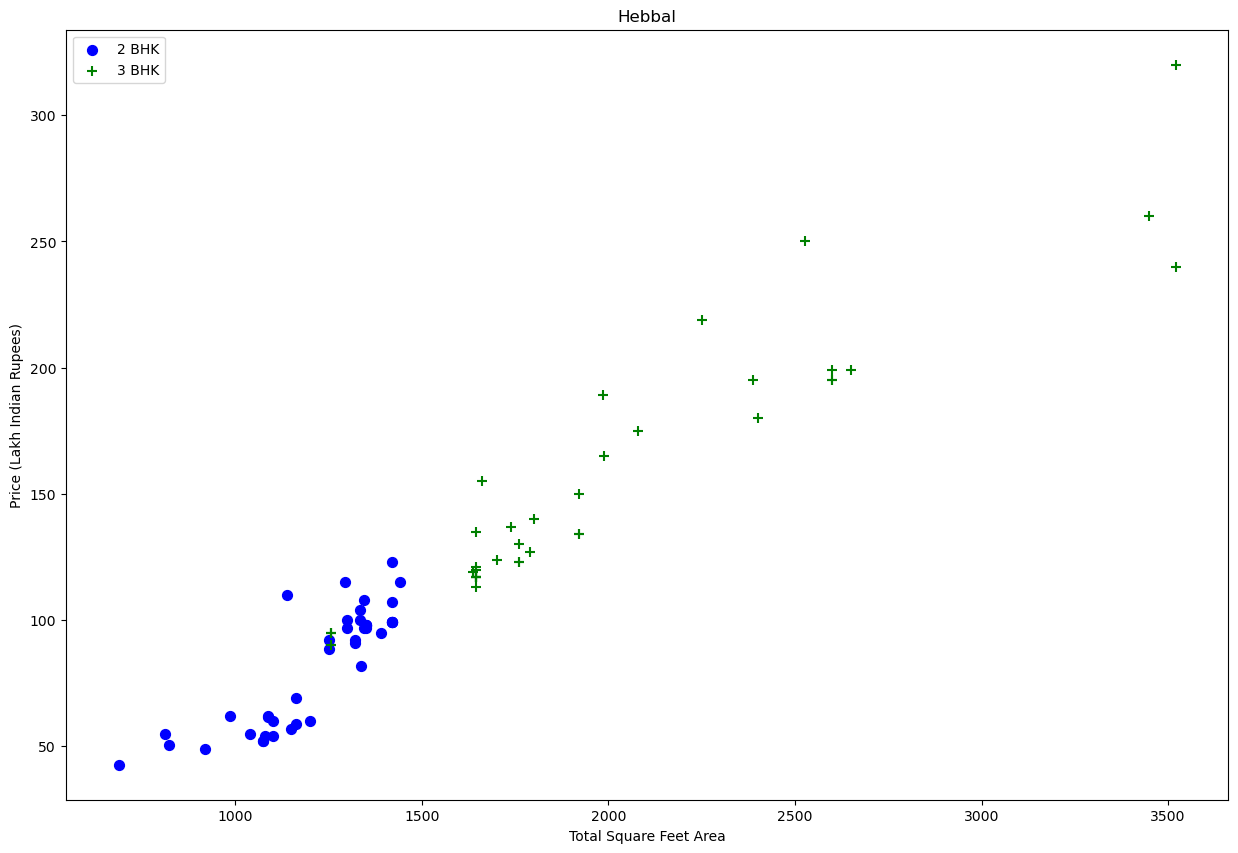

In [81]:
plot_scatter_chart(df7,"Hebbal")


In [82]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10233,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10234,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10237,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10238,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


Text(0, 0.5, 'Count')

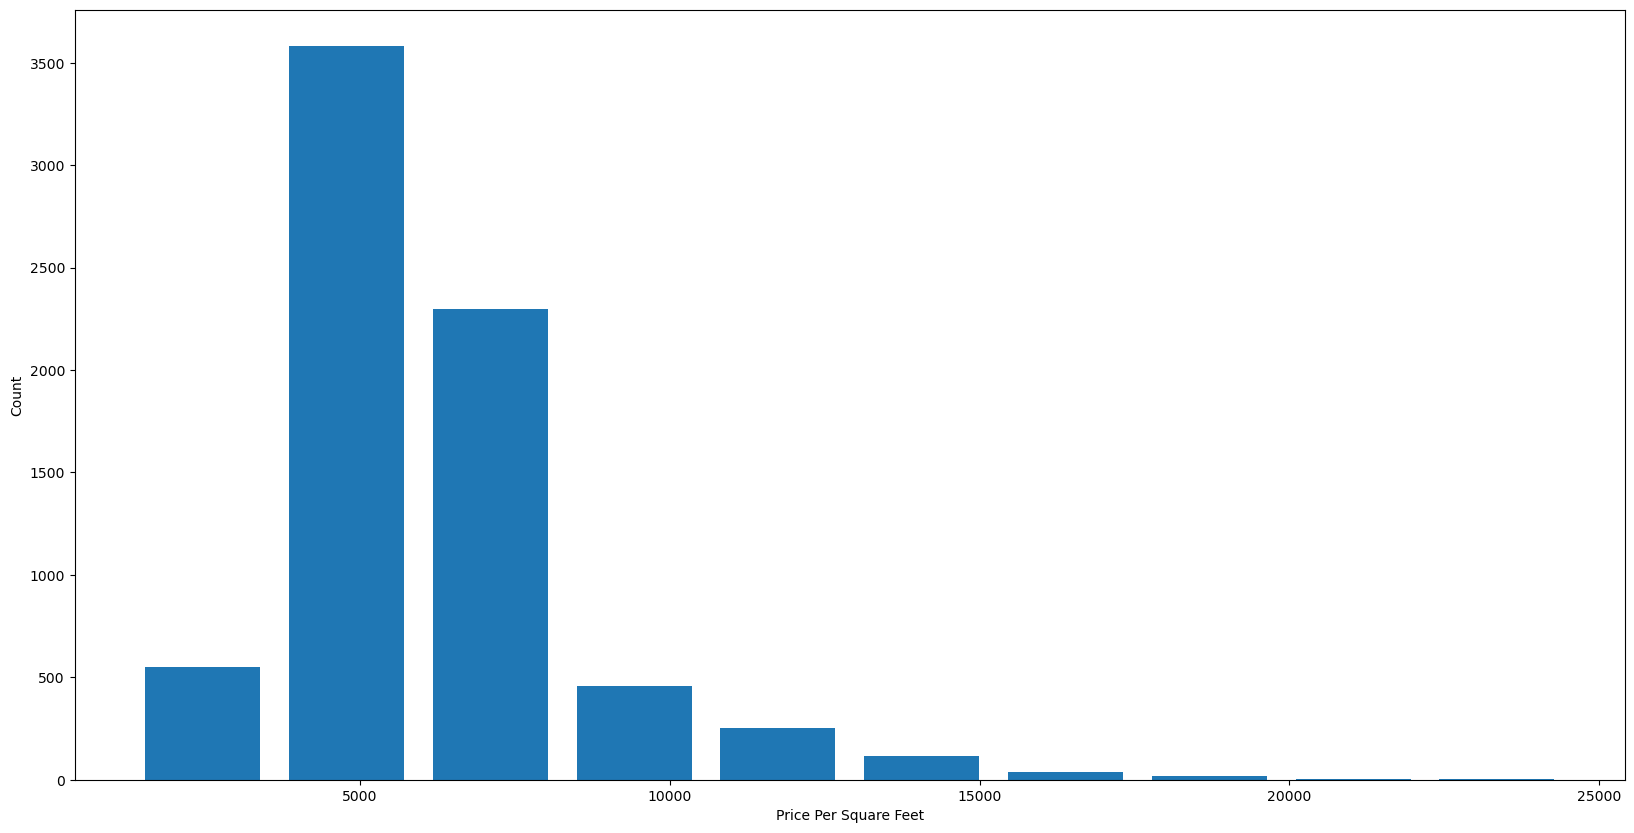

In [84]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

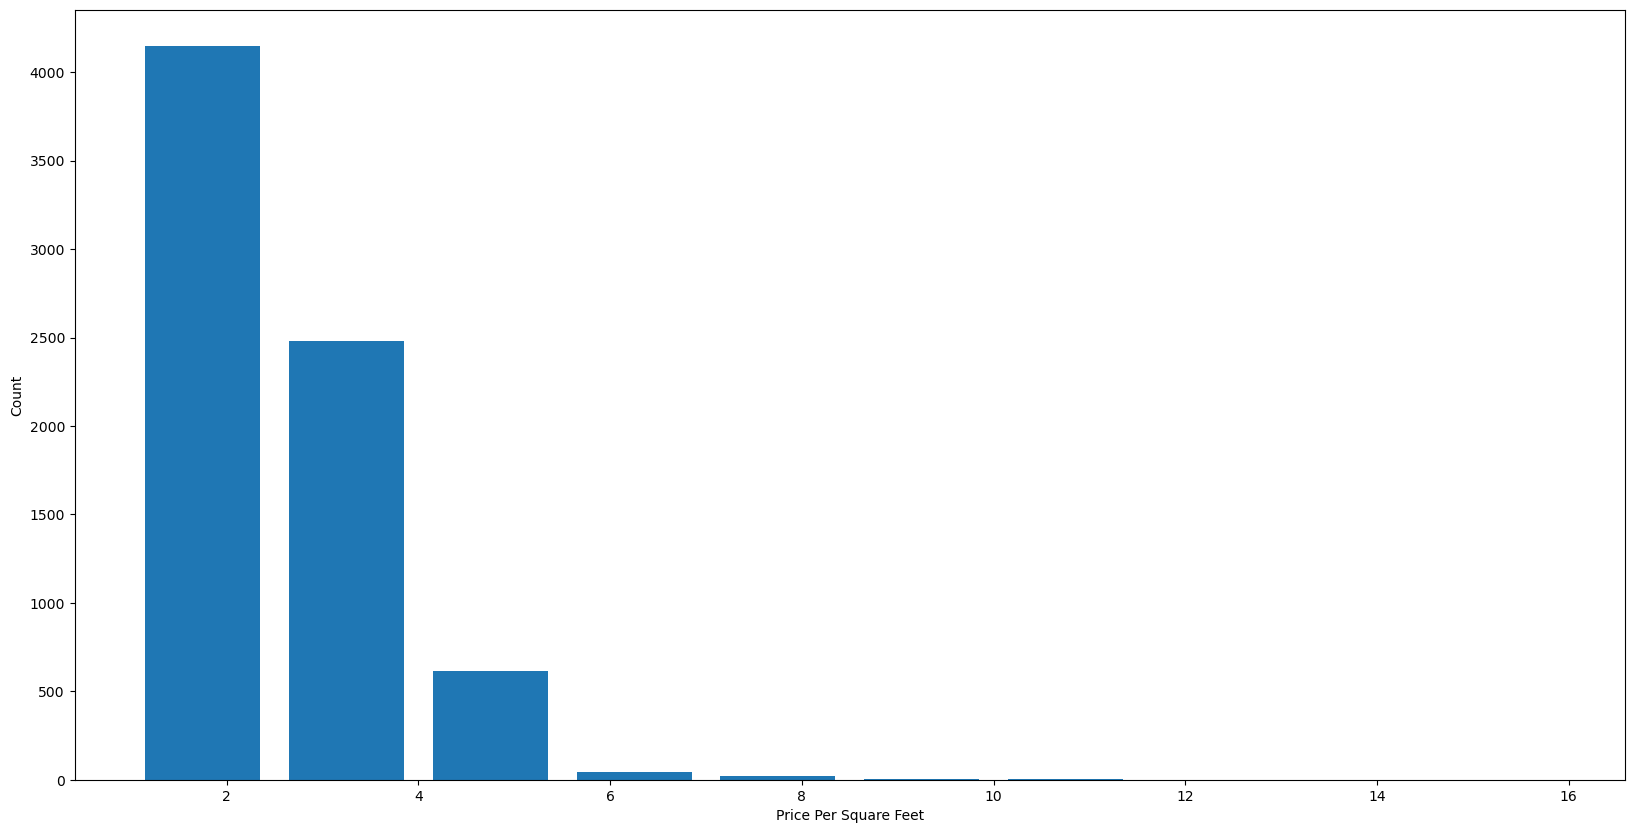

In [85]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.bhk,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

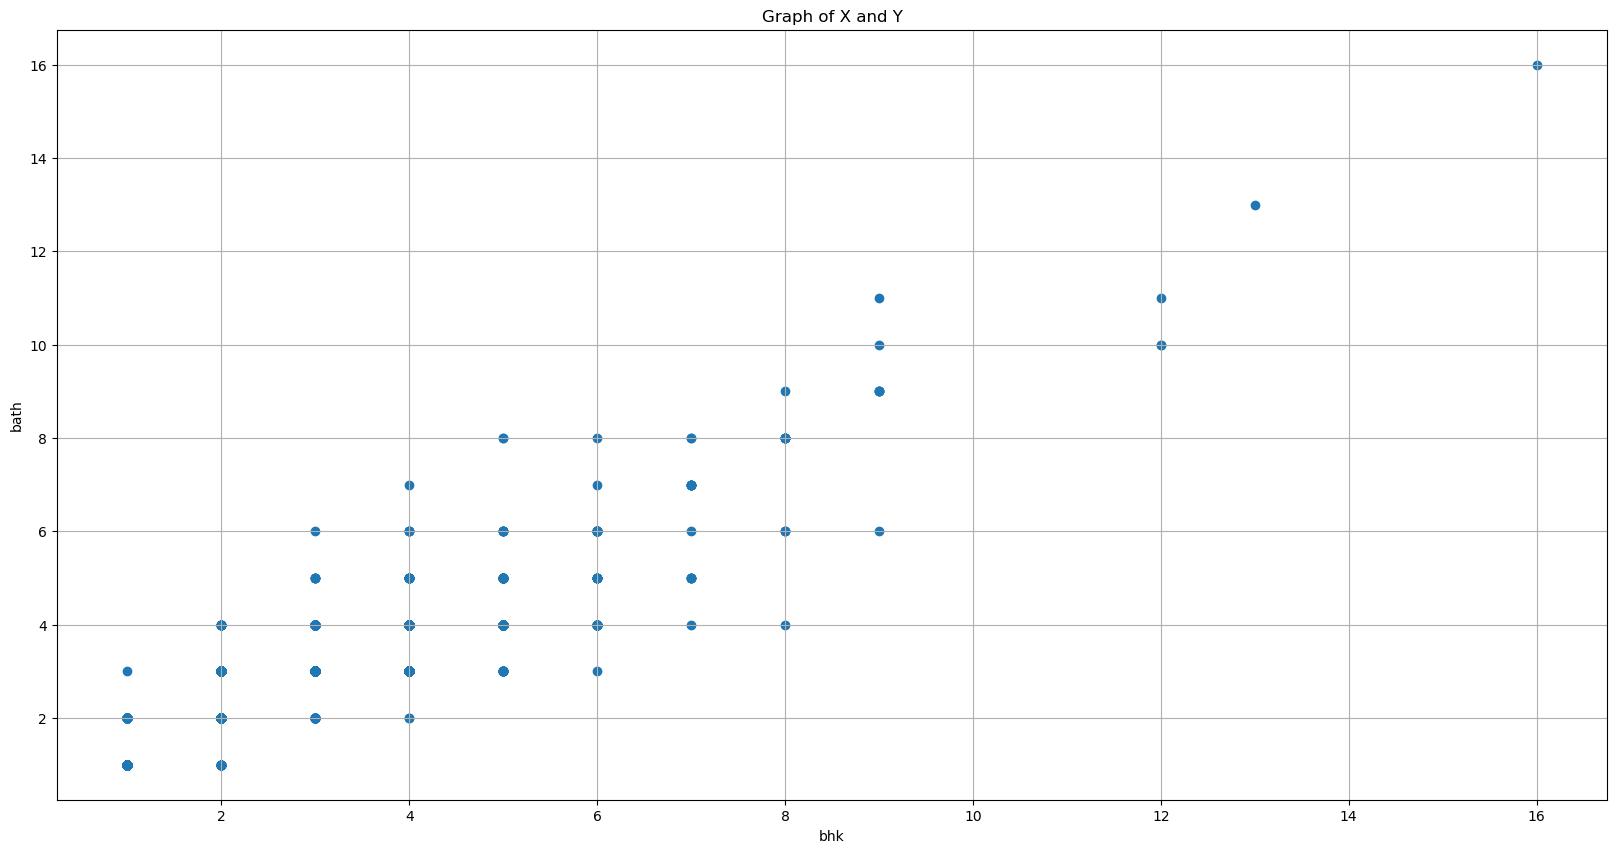

In [88]:
#plot bathrooms against bhk
plt.scatter(df7['bath'], df7['bhk'])
plt.xlabel('bhk')
plt.ylabel('bath')
plt.title('Graph of X and Y')
plt.grid(True)
plt.show()

In [96]:
bath_morethan_bhk= df7[(df7.bath>df7.bhk+2)]
bath_morethan_bhk.shape

(4, 7)

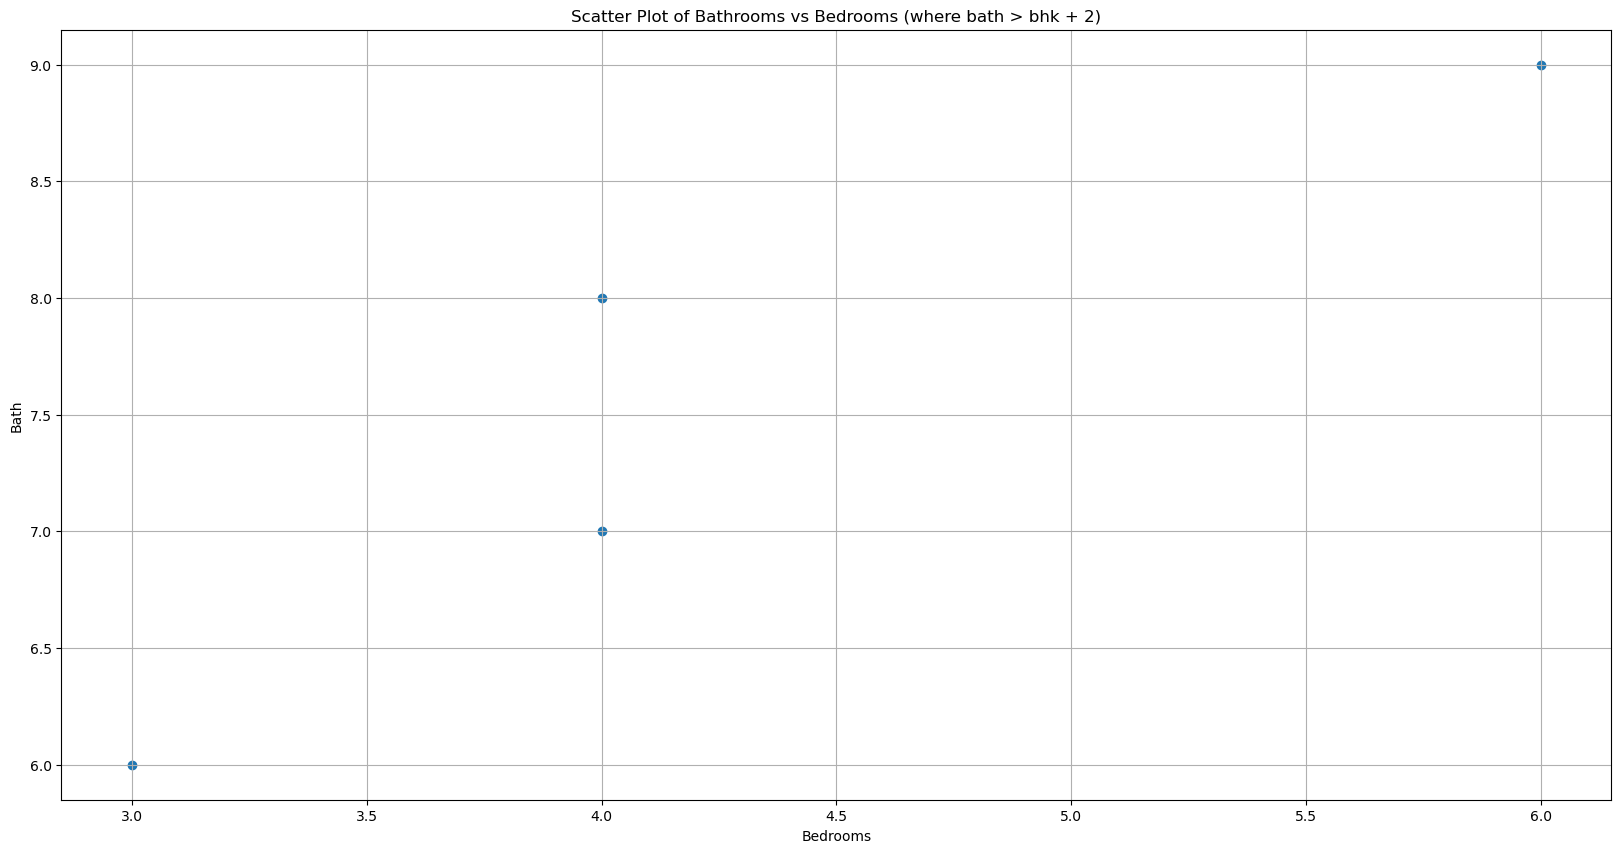

In [91]:
filtered_df = df7[df7.bath > df7.bhk + 2]

# Plotting
plt.scatter(filtered_df['bhk'], filtered_df['bath'])
plt.xlabel('Bedrooms')
plt.ylabel('Bath')
plt.title('Scatter Plot of Bathrooms vs Bedrooms (where bath > bhk + 2)')
plt.grid(True)
plt.show()

In [103]:
df8 = df7[df7.bath<df7.bhk+2]
df8.shape

(7239, 7)

In [106]:
#Drop unnecessary column
df9 = df8.drop(['size','price_per_sqft'],axis='columns')
df9.shape

(7239, 5)

In [107]:
#One hot coding
#Create dummy variables for location column
dummies = pd.get_dummies(df9.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [109]:
#to avoid dummy variable trap, drop a column 
#it could be any column, here we are dropping other column
df10 = pd.concat([df9,dummies.drop('other',axis='columns')],axis='columns')
df10.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:
#Drop column location as we have encoded it now 
df11 = df10.drop('location',axis='columns')
df11.head(2)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,194.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [111]:
#Build the model now
df11.shape

(7239, 244)

In [113]:
#split the data into independent variables X(or features) and dependent variable Y (price) 
X =df11.drop(['price'],axis='columns')
X.head(2)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [114]:
X.shape

(7239, 243)

In [115]:
y = df11['price']
y.shape

(7239,)

In [116]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [117]:
#Use linear regression to train the model
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)


0.8629132245229478

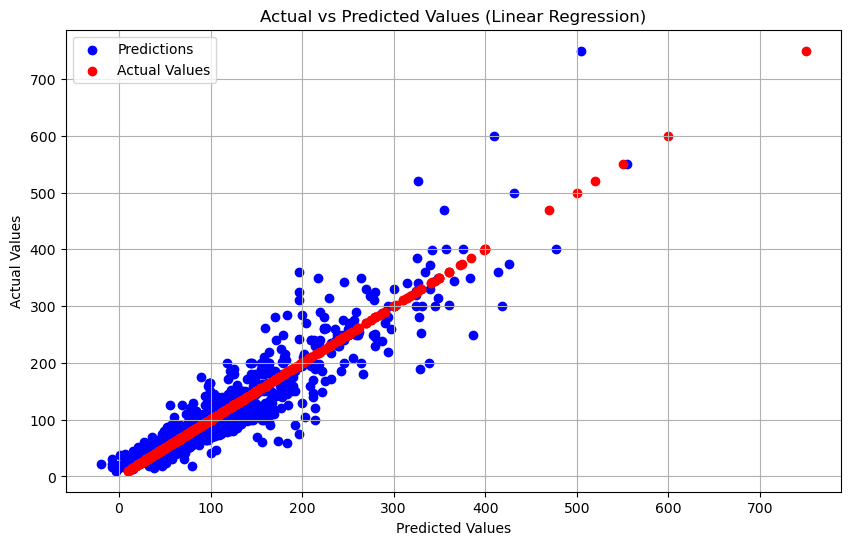

In [127]:
#plotting x_test values and y_test values 
import matplotlib.pyplot as plt

# Assuming lr_clf is your trained linear regression model

# Make predictions on the test data
predictions = lr_clf.predict(X_test)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(predictions, y_test, color='blue', label='Predictions')
plt.scatter(y_test, y_test, color='red', label='Actual Values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


In [128]:
#Use K Fold cross validation to measure accuracy of our LinearRegression model
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [132]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X' : [True, False],
                'fit_intercept' : [True, False],
                'n_jobs' : [1,2,3],
                'positive' : [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_b
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", 

,model,best_score,best_params
0,linear_regression,0.847951,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.726738,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.714813,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [140]:
print(X_test.head(5))

       total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
10144      1500.0   3.0    3                False               False   
5511       1150.0   2.0    2                False               False   
2810       1080.0   2.0    2                False               False   
5014       1358.0   2.0    2                False               False   
3475       1200.0   3.0    3                False               False   

       2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
10144                      False                 False                 False   
5511                       False                 False                 False   
2810                       False                 False                 False   
5014                       False                 False                 False   
3475                       False                 False                 False   

       5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
10144        

In [141]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]
    print(f"loc_index : {loc_index}")

    x = np.zeros(len(X.columns))
    print(f"x : {x}")
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [142]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

loc_index : 4
x : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0.]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.86570258306718

In [136]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.08062284981497

In [137]:
predict_price('Indira Nagar',1000, 2, 2)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


193.31197733178044

In [138]:
predict_price('Indira Nagar',1000, 3, 3)


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


195.52689759852825

In [146]:
#Export the tested model to a pickle file
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [147]:
#Export location and column information to a file that will be useful later on in our prediction application
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))